1. Import data sets and Load data set
2. Make the data proper to make use of data for analysis

In [72]:
import pandas as pd

def load_csv_manual(filepath):
    data =  []
    col = []
    checkcol = False
    with open(filepath) as f:
        for val in f.readlines():
            val = val.replace("\n","")
            val = val.split(';')
            val1 = []
            for i in val:
                val1.append(str(i).strip('""'))
            if checkcol is False:
                col = val1
                checkcol = True
            else:
                data.append(val1)      
    df = pd.DataFrame(data=data, columns=col)
    return df
bank_df=load_csv_manual('bank_(1).csv')

In [2]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


A.	 Identify the Features data types before entering into the analysis

In [61]:
datatypes=bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int32 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int32 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int32 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int32 
 12  campaign   4521 non-null   int32 
 13  pdays      4521 non-null   int32 
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int32(6), object(11)
memory usage: 494.6+ KB


B.Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once.

In [73]:
bank_df=bank_df.astype({'age':'int','balance':'int','day':'int','duration':'int','campaign':'int','pdays':'int'})

In [55]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


C.	Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values.

In [79]:
# drop_1=bank_df[bank_df['education']=='unknown'].index
# bank_df.drop(drop_1,inplace=True)
# drop_2=bank_df[(bank_df['job']=='unknown')].index
# bank_df.drop(drop_2,inplace=True)
# drop_3=bank_df[(bank_df['contact']=='unknown')].index
# bank_df.drop(drop_3,inplace=True)
# drop_4=bank_df[(bank_df['poutcome']=='unknown')].index
# bank_df.drop(drop_4,inplace=True)
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

D.	 Find duplicates (if necessary)

In [80]:
bank_df.duplicated().value_counts()

False    4521
dtype: int64

## Checkpoint 2

3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

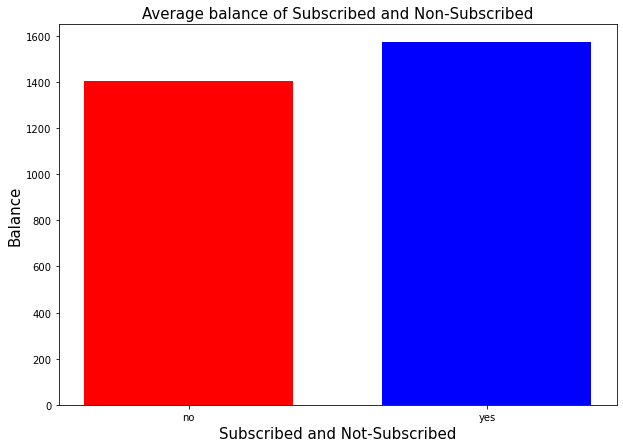

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
balance1=pd.pivot_table(bank_df,index=bank_df['y'],aggfunc='mean')
plt.bar(x=balance1.index,height=balance1['balance'],width=0.7,color=['red','blue'])
plt.ylabel('Balance',fontsize=15)
plt.xlabel('Subscribed and Not-Subscribed',fontsize='15')
plt.title('Average balance of Subscribed and Non-Subscribed',fontsize='15')
plt.show()


In [20]:
balance1.loc[:,'balance']

y
no     1403.211750
yes    1571.955854
Name: balance, dtype: float64

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


4. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.
 


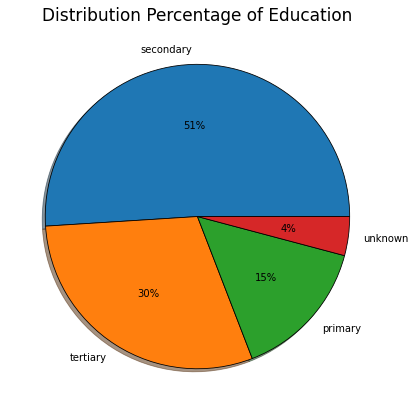

In [33]:
plt.figure(figsize=(10,7))
education=bank_df['education'].value_counts()
plt.pie(x=education,labels=education.index,autopct='%.f%%',wedgeprops={'linewidth':0.8,'edgecolor':'black'},shadow=True)
plt.title('Distribution Percentage of Education',fontsize=17)
plt.show()

5. Create a function that should be able to create a new feature(Variable) called season using the month column.

In [58]:
def season_column(row):
    if row=='jan':
        return 'winter'
    if row=='feb':
        return 'winter'
    elif row=='mar':
        return 'spring'
    elif row=='apr':
        return 'spring'
    elif row=='jun':
        return 'summer'
    elif row=='jul':
        return 'summer'
    elif row=='aug':
        return 'summer'
    elif row=='sep':
        return 'autumn'
    elif row=='oct':
        return 'autumn'
    elif row=='nov':
        return 'autumn'
    elif row=='dec':
        return 'winter'
    elif row=='may':
        return 'spring'
bank_df['Season']=bank_df['month'].map(season_column)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,spring


6.  Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.

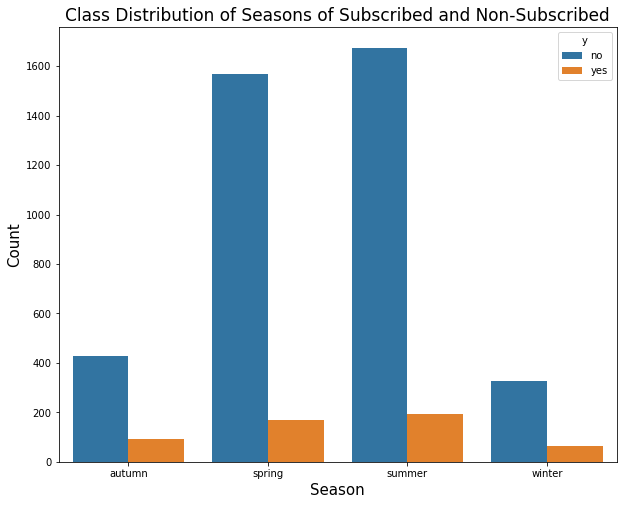

In [50]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(x=bank_df['Season'],hue=bank_df['y'])
plt.xlabel('Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Class Distribution of Seasons of Subscribed and Non-Subscribed',fontsize=17)
plt.show()

7. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

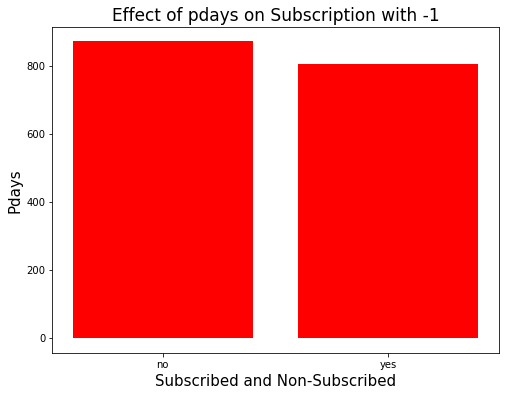

In [74]:
plt.figure(figsize=(8,6))
plt.bar(bank_df['y'],bank_df['pdays'],color='red')
plt.xlabel('Subscribed and Non-Subscribed',fontsize=15)
plt.ylabel('Pdays',fontsize=15)
plt.title('Effect of pdays on Subscription with -1',fontsize=17)
plt.show()

8. Replace the -1 as nan values for the P-days store.

In [67]:
import numpy as np
bank_df['pdays'].replace(-1,np.nan,inplace=True)
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,NaN,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,NaN,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,NaN,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211.0,3,other,no


9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9.

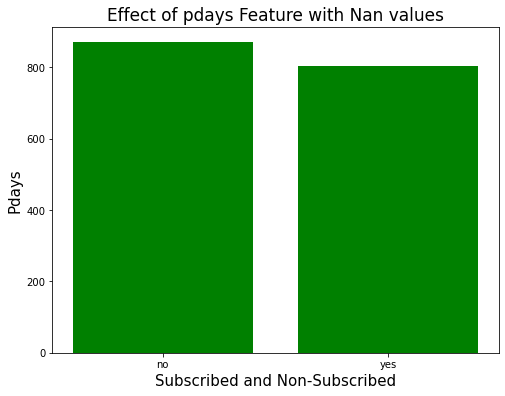

In [71]:
plt.figure(figsize=(8,6))
plt.bar(bank_df['y'],bank_df['pdays'],color='green')
plt.xlabel('Subscribed and Non-Subscribed',fontsize=15)
plt.ylabel('Pdays',fontsize=15)
plt.title('Effect of pdays Feature with Nan values',fontsize=17)
plt.show()


10. Does the customer take the term subscription who has less than 0 balance?
Hint: Use any kind of plot which would you the related information to this question.


C:\Users\HTPP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


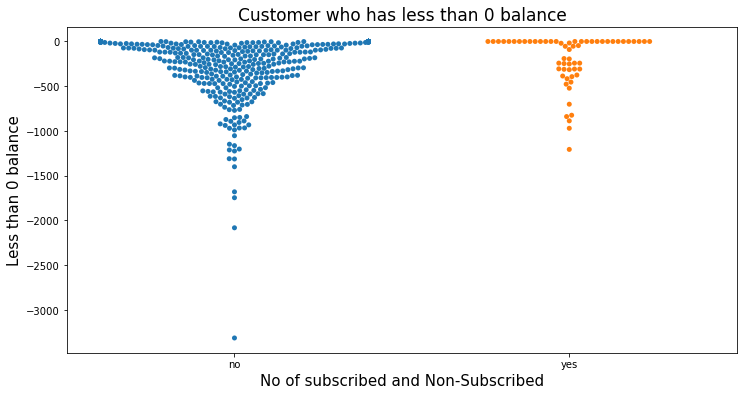

In [105]:
balance2=bank_df.iloc[:,5:17:11]
z=balance2[balance2['balance']<=0]
#plt.bar(x=z['y'],height=z['balance'])
#sns.scatterplot(x=z['y'],y=z['balance'])
plt.figure(figsize=(12,6))
sns.swarmplot(x=z['y'],y=z['balance'])
plt.title('Customer who has less than 0 balance',fontsize=17)
plt.ylabel('Less than 0 balance',fontsize=15)
plt.xlabel('No of subscribed and Non-Subscribed',fontsize=15)
plt.show()

In [103]:
z['y'].value_counts()

no     663
yes     60
Name: y, dtype: int64

11. Use Pivot table to find the maximum balance for each type of job.

In [107]:
balance=pd.pivot_table(bank_df,index=bank_df['job'],aggfunc=max)
balance.iloc[:,1:3:2]

,balance
job,
admin.,22171
blue-collar,16353
entrepreneur,42045
housemaid,26965
management,27359
retired,71188
self-employed,16430
services,26394
student,11555


12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

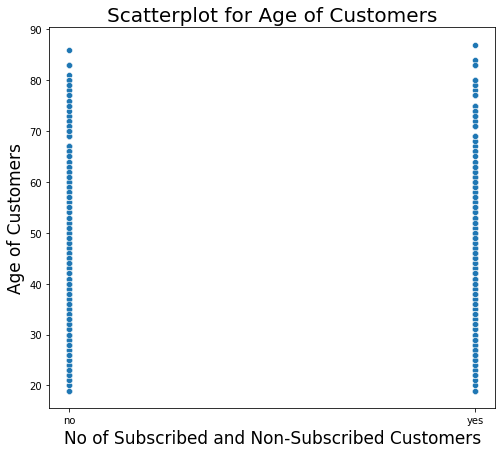

In [117]:
plt.figure(figsize=(8,7))
sns.scatterplot(x=bank_df['y'],y=bank_df['age'])
plt.xlabel('No of Subscribed and Non-Subscribed Customers',fontsize=17)
plt.ylabel('Age of Customers',fontsize=17)
plt.title('Scatterplot for Age of Customers',fontsize=20)
plt.show()

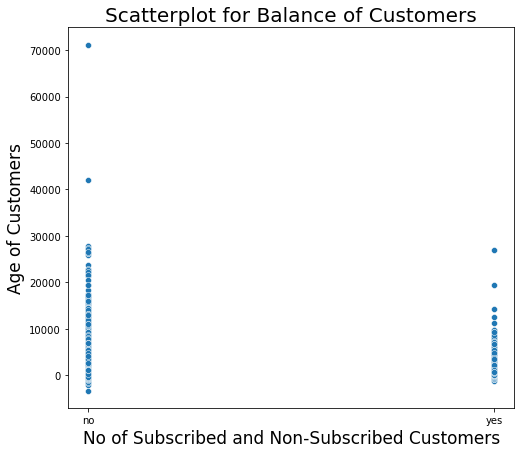

In [118]:
plt.figure(figsize=(8,7))
sns.scatterplot(x=bank_df['y'],y=bank_df['balance'])
plt.xlabel('No of Subscribed and Non-Subscribed Customers',fontsize=17)
plt.ylabel('Age of Customers',fontsize=17)
plt.title('Scatterplot for Balance of Customers',fontsize=20)
plt.show()


13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.


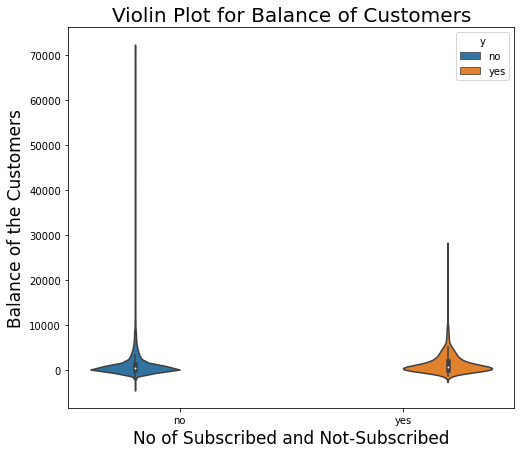

In [119]:
plt.figure(figsize=(8,7))
sns.violinplot(x=bank_df['y'],y=bank_df['balance'],hue=bank_df['y'])
plt.xlabel('No of Subscribed and Not-Subscribed',fontsize=17)
plt.ylabel('Balance of the Customers',fontsize=17)
plt.title('Violin Plot for Balance of Customers',fontsize=20)
plt.show()

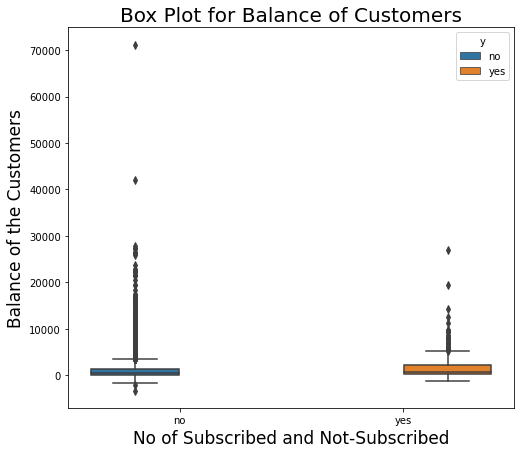

In [120]:
plt.figure(figsize=(8,7))
sns.boxplot(x=bank_df['y'],y=bank_df['balance'],hue=bank_df['y'])
plt.xlabel('No of Subscribed and Not-Subscribed',fontsize=17)
plt.ylabel('Balance of the Customers',fontsize=17)
plt.title('Box Plot for Balance of Customers',fontsize=20)
plt.show()

14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.
Note: Try to explore more parameters that are there in the pie-plot method.

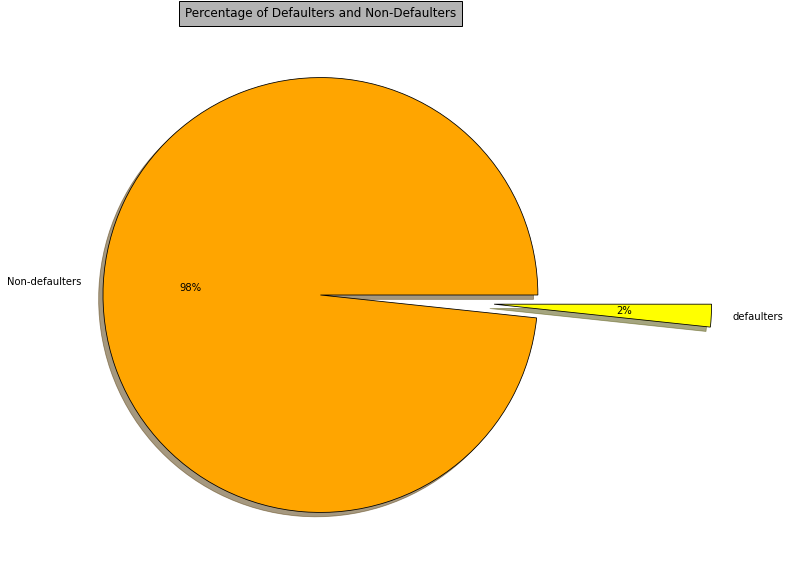

In [123]:
plt.figure(figsize=(10,10))

defaulters=bank_df['default'].value_counts()
plt.pie(x=defaulters,labels=['Non-defaulters','defaulters'],autopct='%.f%%',explode=[0.0,0.8],colors=['orange','yellow'],
       wedgeprops={'linewidth':0.8,'edgecolor':'black'},shadow=True)
plt.title('Percentage of Defaulters and Non-Defaulters',bbox={'facecolor':'0.7','pad':6})
plt.show()

15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

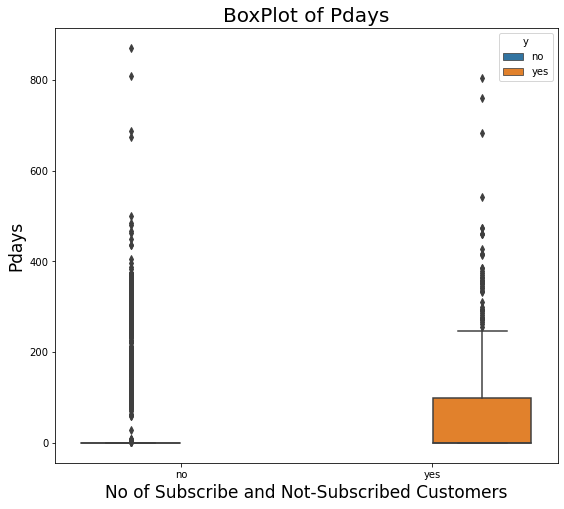

In [132]:
plt.figure(figsize=(9,8))
sns.boxplot(x=bank_df['y'],y=bank_df['pdays'],hue=bank_df['y'])
plt.title('BoxPlot of Pdays',fontsize=20)
plt.xlabel('No of Subscribe and Not-Subscribed Customers',fontsize = 17)
plt.ylabel('Pdays',fontsize=17)
plt.show()

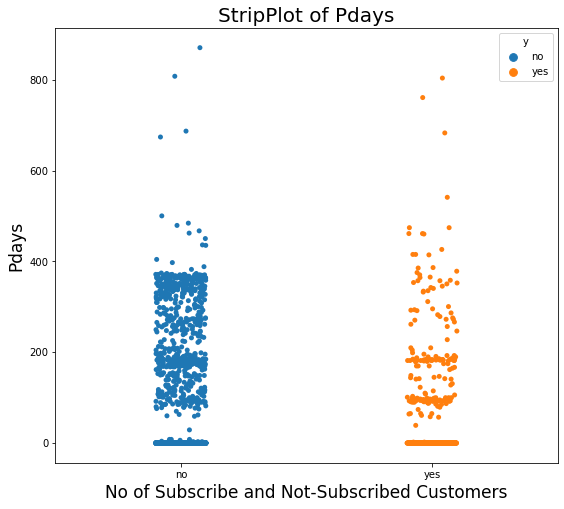

In [133]:
plt.figure(figsize=(9,8))
sns.stripplot(x=bank_df['y'],y=bank_df['pdays'],hue=bank_df['y'])
plt.title('StripPlot of Pdays',fontsize=20)
plt.xlabel('No of Subscribe and Not-Subscribed Customers',fontsize = 17)
plt.ylabel('Pdays',fontsize=17)
plt.show()